# Library imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

import numerical_utility as nu

# Q1

HW2-Q4
f(-2) ≈ 0.0358
f(-1) ≈ 0.1698
f(0) ≈ 0.8896
f(1) ≈ 0.1698
f(2) ≈ 0.0358


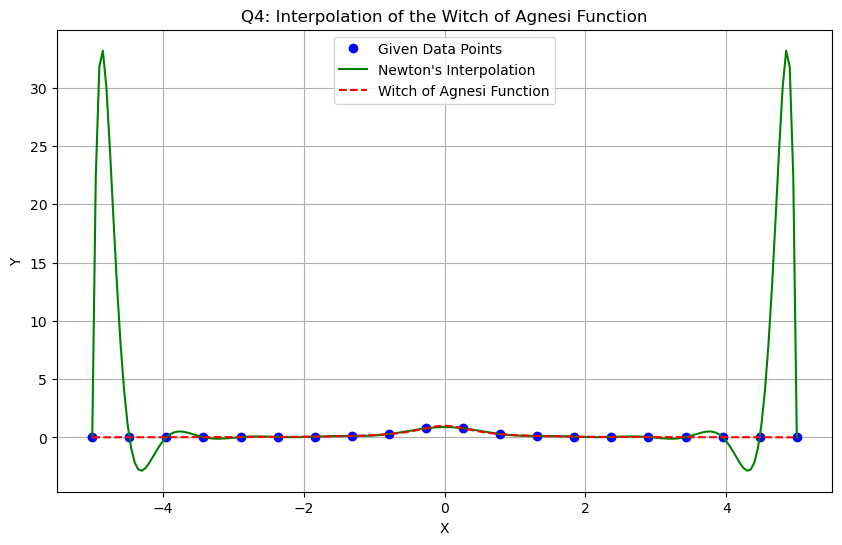

In [2]:
# Q4: Witch of Agnesi
def witch_of_agnesi(x):
    return 1 / (4 * x**2 + 1)

x_data_q4 = np.linspace(-5, 5, 20)
y_data_q4 = witch_of_agnesi(x_data_q4)

x_inter_q4 = np.linspace(-5, 5, 200)
y_inter_q4 = [nu.newton_interpolation(x_data_q4, y_data_q4, xi) for xi in x_inter_q4]


print("HW2-Q4")
for xi in [-2, -1, 0, 1, 2]:
    yi = nu.newton_interpolation(x_data_q4, y_data_q4, xi)
    print(f"f({xi}) ≈ {yi:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(x_data_q4, y_data_q4, 'o', label="Given Data Points", color="blue")
plt.plot(x_inter_q4, y_inter_q4, label="Newton's Interpolation", color="green")
plt.plot(x_inter_q4, witch_of_agnesi(x_inter_q4), label="Witch of Agnesi Function", color="red", linestyle="--")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Q4: Interpolation of the Witch of Agnesi Function")
plt.legend()
plt.grid(True)
plt.show()


HW2-Q6
f(-2) ≈ -56.000000
f(-1) ≈ -16.000000
f(0) ≈ -1.000000
f(1) ≈ -2.000000
f(2) ≈ -6.000000


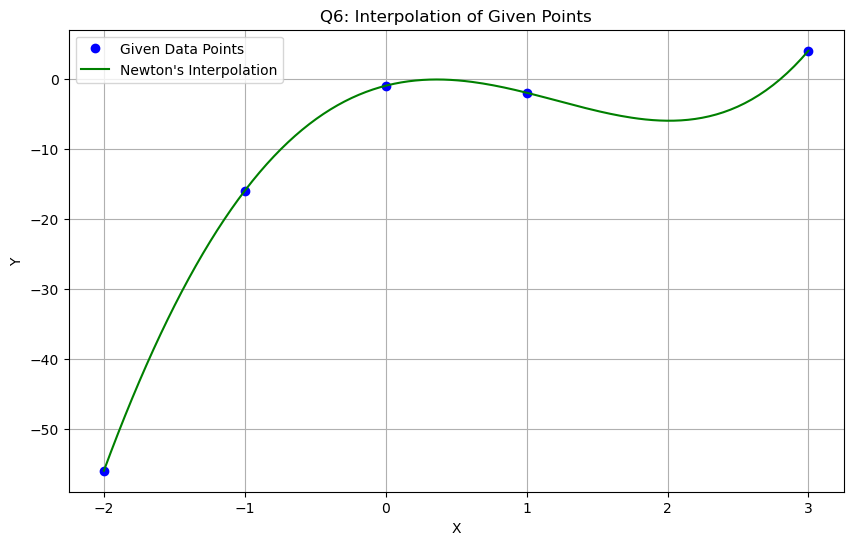

In [3]:
# Q6
x_data_q6 = [1, 0, -2, 3, -1]
y_data_q6 = [-2, -1, -56, 4, -16]

x_inter_q6 = np.linspace(min(x_data_q6), max(x_data_q6), 200)
y_inter_q6 = [nu.newton_interpolation(x_data_q6, y_data_q6, xi) for xi in x_inter_q6]

print("\nHW2-Q6")
for xi in [-2, -1, 0, 1, 2]: 
    yi = nu.newton_interpolation(x_data_q6, y_data_q6, xi)
    print(f"f({xi}) ≈ {yi:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(x_data_q6, y_data_q6, 'o', label="Given Data Points", color="blue")
plt.plot(x_inter_q6, y_inter_q6, label="Newton's Interpolation", color="green")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Q6: Interpolation of Given Points")
plt.legend()
plt.grid(True)
plt.show()

# Q2

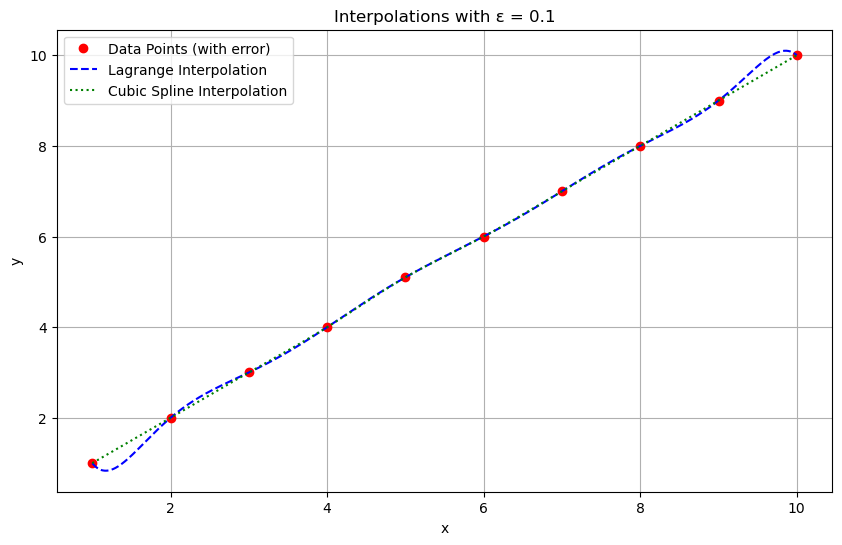

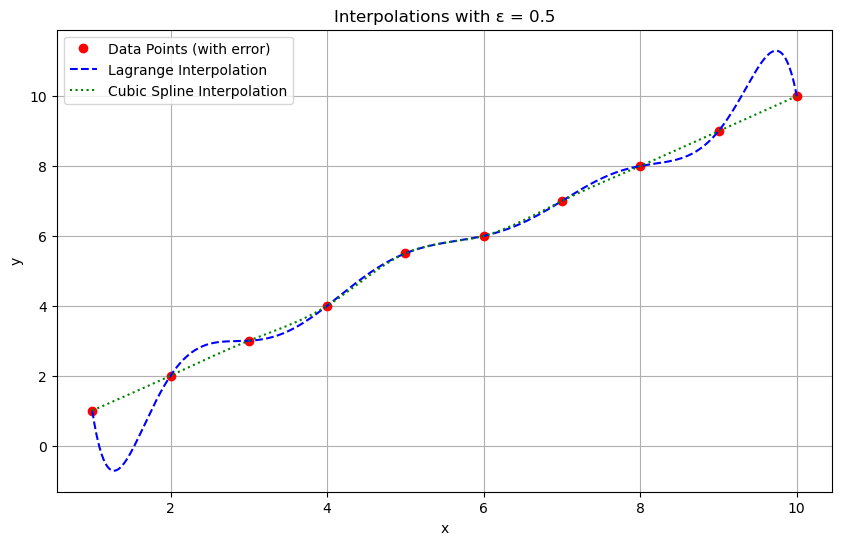

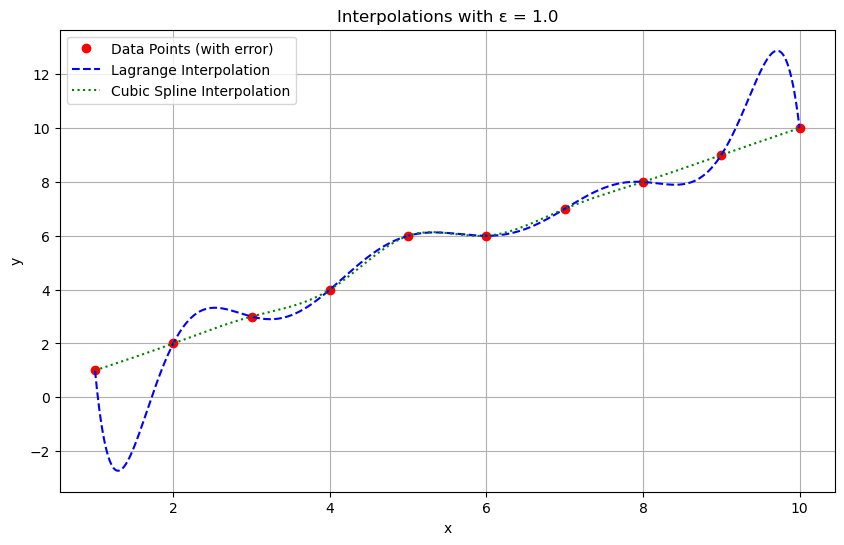

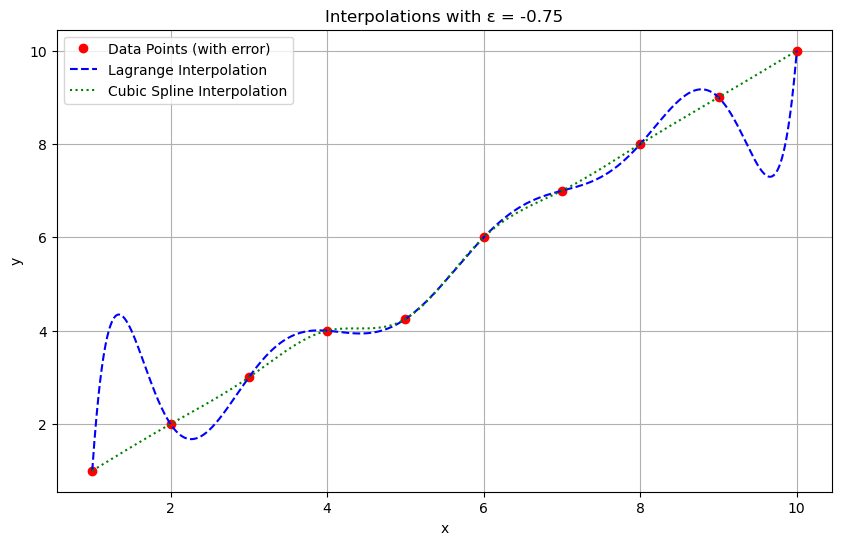

In [4]:
def plot_interpolations(x_pts, y_pts, e):
    y_err = y_pts.copy()
    y_err[4] += e

    xy_points = list(zip(x_pts, y_err))
    x_seq = np.linspace(min(x_pts), max(x_pts), 1000)

    # lagrange
    P_lagrange = [nu.lagrange_interpolation(xy_points, x, len(x_pts) - 1) for x in x_seq]

    # cubicspline 
    a, b, c, d = nu.cubic_spline_interpolation(x_pts, y_err)
    P_cubicspline = [nu.evaluate_spline(x, x_pts, a, b, c, d) for x in x_seq]

    plt.figure(figsize=(10, 6))
    plt.plot(x_pts, y_err, 'o', label="Data Points (with error)", color="red")
    plt.plot(x_seq, P_lagrange, label="Lagrange Interpolation", linestyle="--", color="blue")
    plt.plot(x_seq, P_cubicspline, label="Cubic Spline Interpolation", linestyle=":", color="green")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Interpolations with ε = {e}")
    plt.legend()
    plt.grid(True)
    plt.show()

x_pts = list(range(1, 11))
y_pts = list(range(1, 11))

es = [0.1, 0.5, 1.0, -0.75]

for e in es:
    plot_interpolations(x_pts, y_pts, e)

### REMARKS: 

We see that the cubic spline interpolation plots for the verying levels of e do not fluctuate to the extent that the langrange interpolation does. Indeed, with a higher devation of epison from 0 the interpolation plot goes out of whack and shows quite a lot of discrepancies. Also of note is the near mirror imgae like results for negative e value.

# Q5

In [5]:
a = -5
b = 5
x_seq = np.linspace(a, b, 1000)  
n_val = [5, 10, 20, 50]

def f(x):
    return 1 / (1 + x**2)

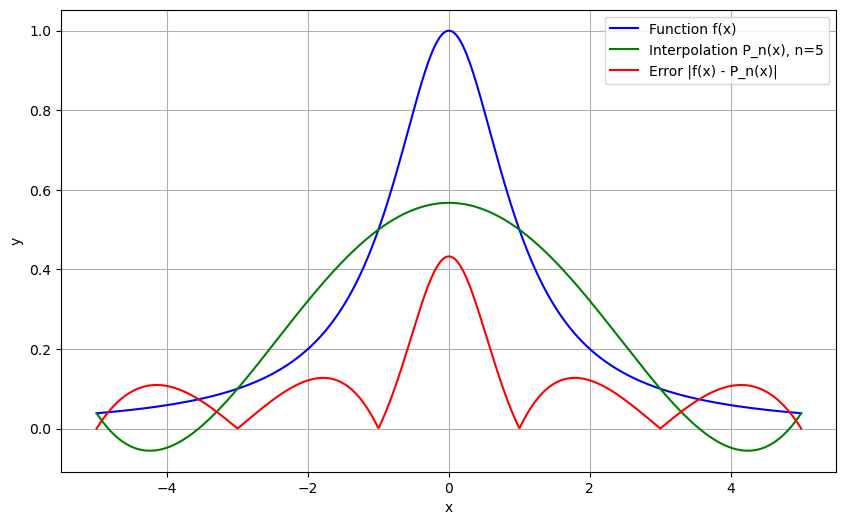

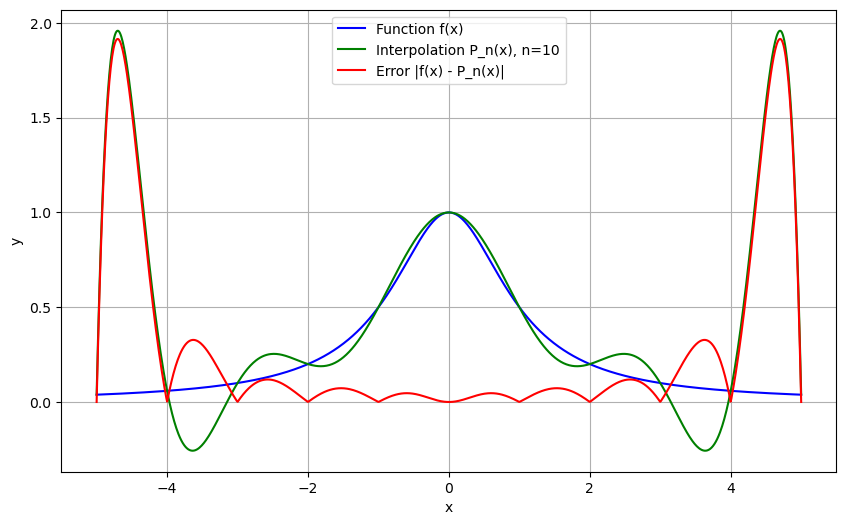

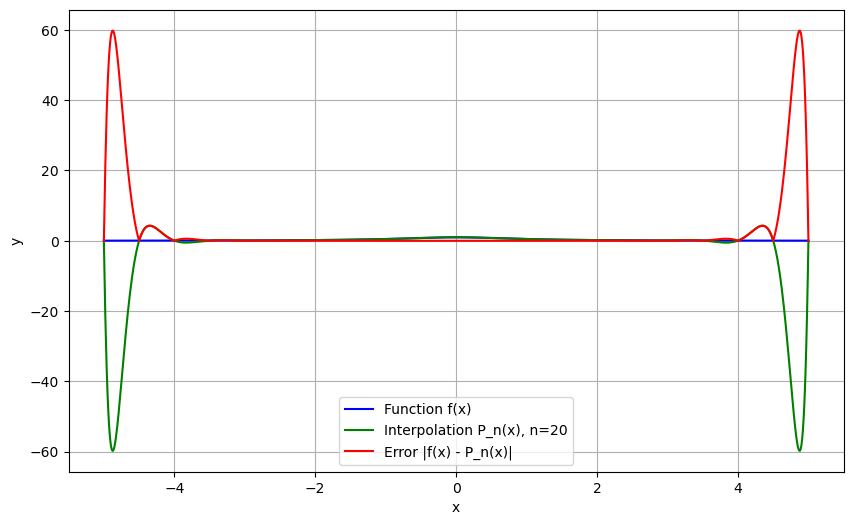

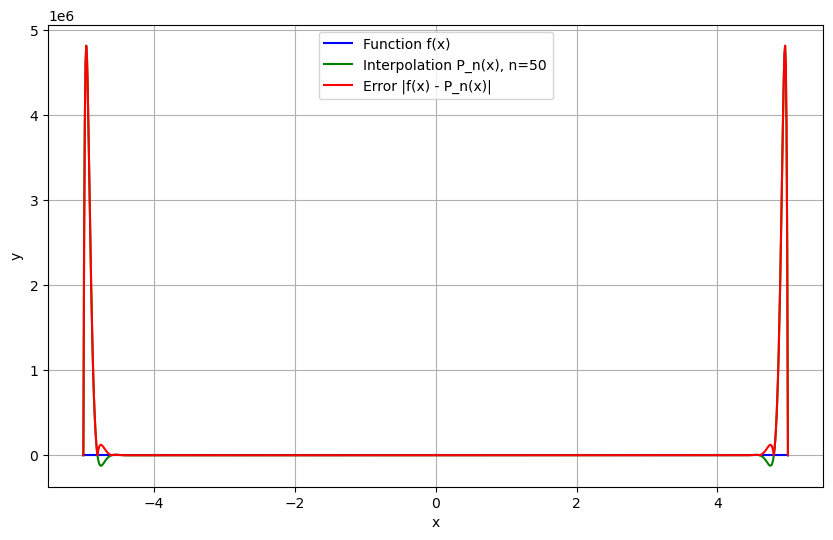

In [6]:
for n in n_val:
    x_pts = nu.base_points(n, a, b)
    y_pts = f(np.array(x_pts))
    xy_points = list(zip(x_pts, y_pts))
    
    P_n = [nu.lagrange_interpolation(xy_points, x, n) for x in x_seq]
    e = np.abs(f(x_seq) - P_n)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_seq, f(x_seq), label="Function f(x)", color="blue")
    plt.plot(x_seq, P_n, label=f"Interpolation P_n(x), n={n}", color="green")
    plt.plot(x_seq, e, label=f"Error |f(x) - P_n(x)|", color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

REMARKS:

We observe significant change in the plot as the value of n changes from 5 to 50. For the base points, initially, there is significant error surrounding x = 0 but for higher values of n they are shifted out ot the edges. Increasing n =10, improves the fit of the inteprolation in the middle, but leaves room for error in the boundaries. For n = 50 there is a huge amount of error at the boundaries. Thus the equally spaced points -5 and +5 are not ideal for higher values of n dues to the persistence of error.

# Q6

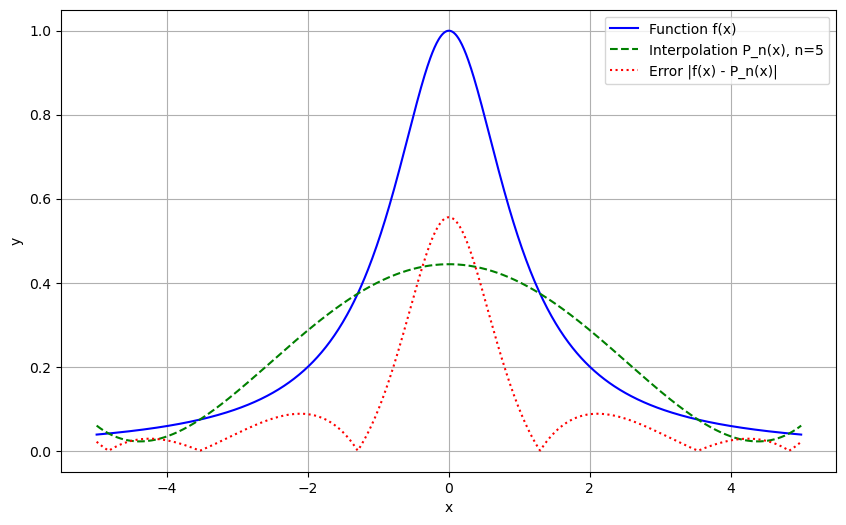

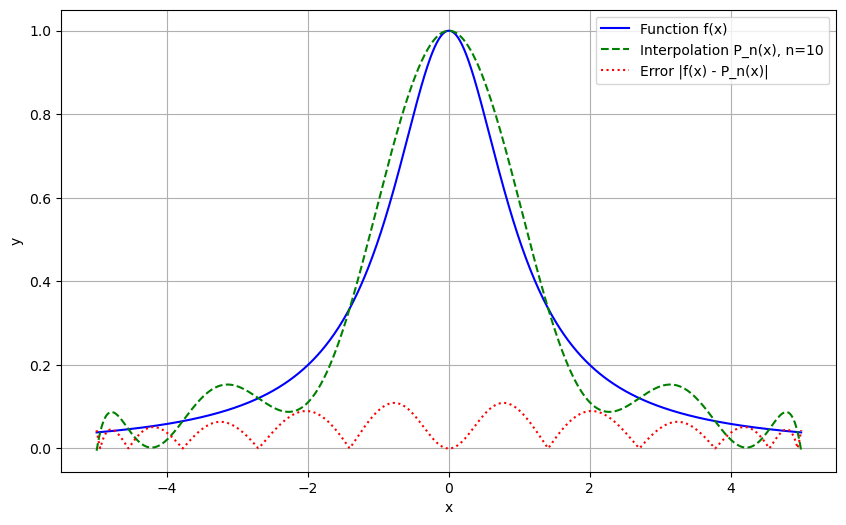

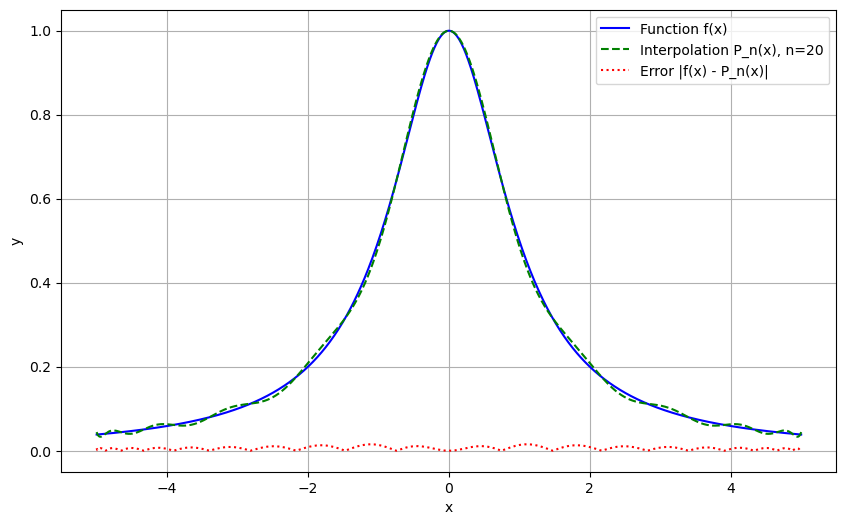

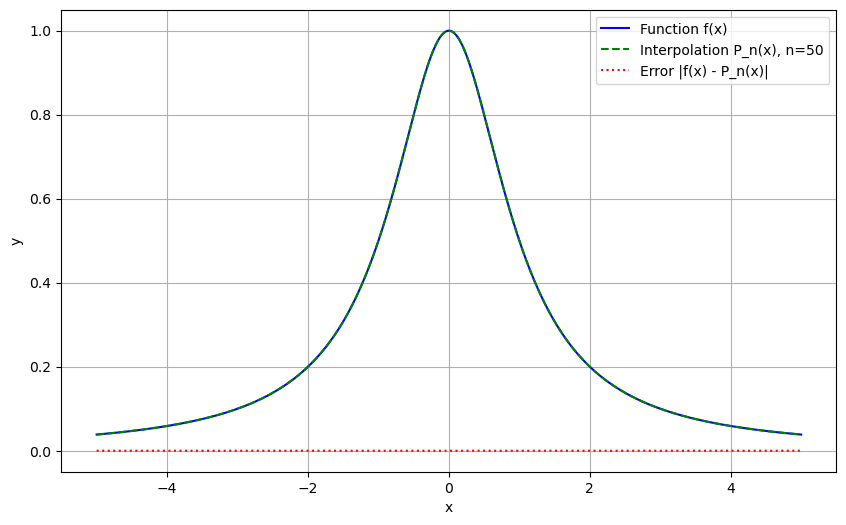

In [7]:
for n in n_val:
    x_pts = nu.chebyshev_points(n, a, b)
    y_pts = f(np.array(x_pts))
    xy_points = list(zip(x_pts, y_pts))
    
    P_n = [nu.lagrange_interpolation(xy_points, x, len(xy_points) - 1) for x in x_seq]
    e = np.abs(f(x_seq) - P_n)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_seq, f(x_seq), label="Function f(x)", color="blue")
    plt.plot(x_seq, P_n, linestyle="--", label=f"Interpolation P_n(x), n={n}", color="green")
    plt.plot(x_seq, e, linestyle=":", label=f"Error |f(x) - P_n(x)|", color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

REMARKS:
As n increases from 5 to 50, the interpolation plot gradually fits perfectly with the actual function plot. The errors are also naturally minimized. This provides a much better performing interpolation with significantly lower errors compared to the base point case. 


# Q8

In [8]:
aapl = yf.download('AAPL', start='2020-09-01', end='2020-09-19', actions=False)

[*********************100%***********************]  1 of 1 completed


In [9]:
aapl

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-09-01 00:00:00+00:00,130.982620,134.179993,134.800003,130.529999,132.759995,151948100
2020-09-02 00:00:00+00:00,128.268829,131.399994,137.979996,127.000000,137.589996,200119000
2020-09-03 00:00:00+00:00,117.999512,120.879997,128.839996,120.500000,126.910004,257599600
2020-09-04 00:00:00+00:00,118.077637,120.959999,123.699997,110.889999,120.070000,332607200
2020-09-08 00:00:00+00:00,110.131599,112.820000,118.989998,112.680000,113.949997,231366600
2020-09-09 00:00:00+00:00,114.524368,117.320000,119.139999,115.260002,117.260002,176940500
2020-09-10 00:00:00+00:00,110.785637,113.489998,120.500000,112.500000,120.360001,182274400
2020-09-11 00:00:00+00:00,109.331116,112.000000,115.230003,110.000000,114.570000,180860300


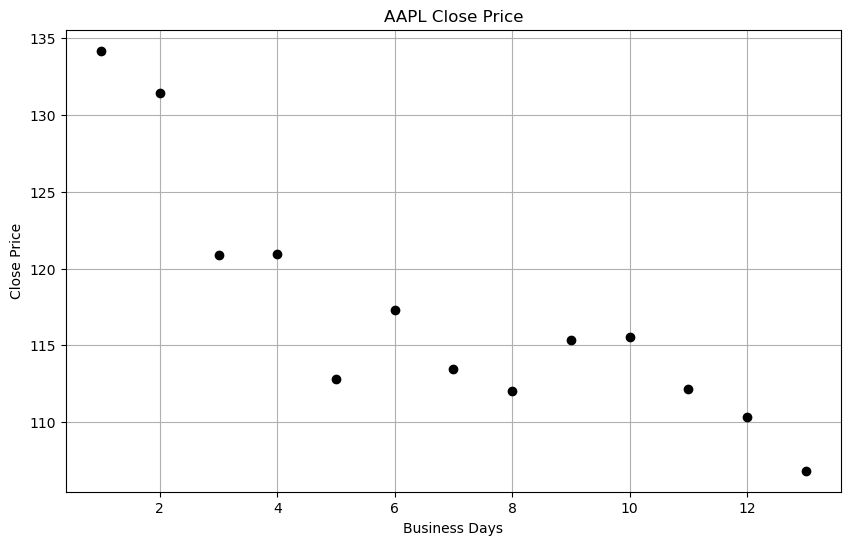

In [10]:
aapl.reset_index(inplace=True)

x_data = list(range(1, len(aapl) + 1))
y_data = aapl[('Close', 'AAPL')].tolist()
xy_points = list(zip(x_data, y_data))

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', color='black')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('AAPL Close Price')
plt.grid(True)
plt.show()

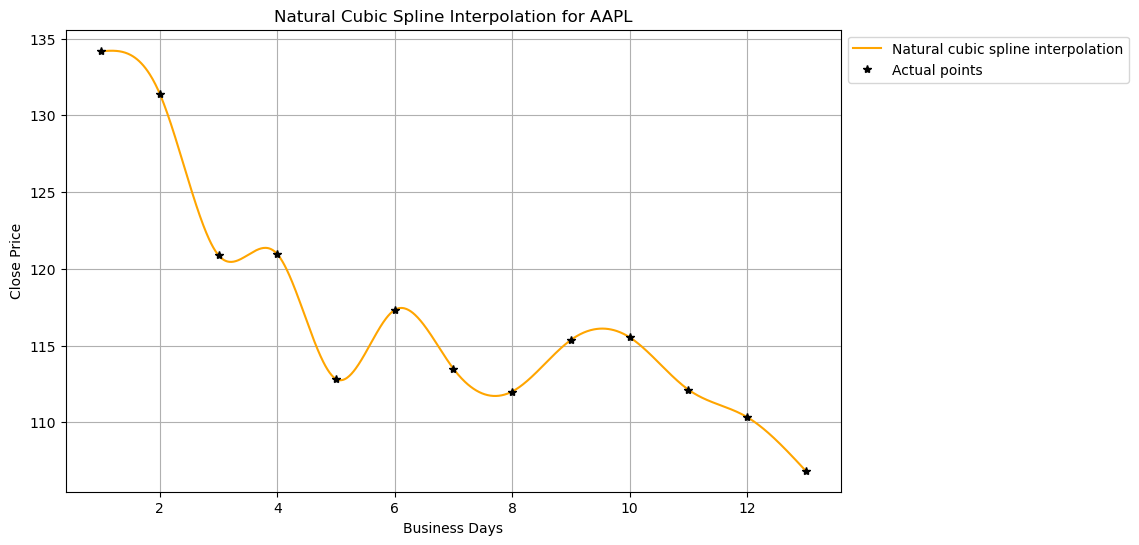

Interpolated price for AAPL for day x = 8.5: 113.58093181076717


In [11]:
# NATURAL CUBIC SPLINE INTERPOLATION

a, b, c, d = nu.cubic_spline_interpolation(x_data, y_data)

x_inter = np.linspace(min(x_data), max(x_data), 1000)
y_inter = [nu.evaluate_spline(i, x_data, a, b, c, d) for i in x_inter]

plt.figure(figsize=(10, 6))
plt.plot(x_inter, y_inter, color='orange', label='Natural cubic spline interpolation')
plt.plot(x_data, y_data, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Natural Cubic Spline Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

interpolated_price = nu.evaluate_spline(8.5, x_data, a, b, c, d)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

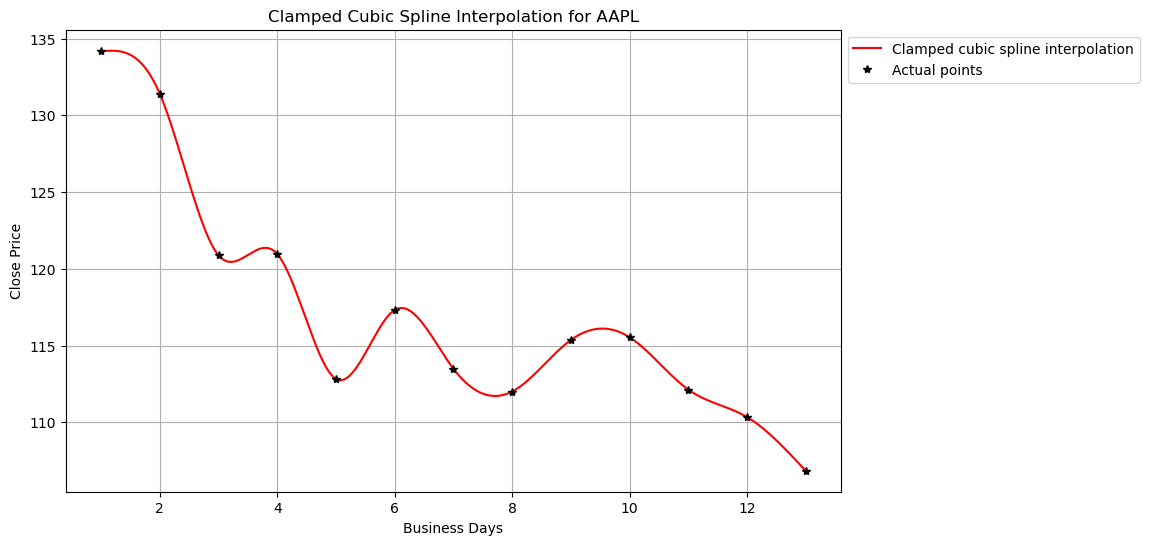

Interpolated price for AAPL for day x = 8.5: 113.58093181076717


In [12]:
# CLAMPED CUBIC SPLINE INTERPOLATION

der_a, der_b = 0.0, 0.0

a, b, c, d = nu.clamped_cubic_spline(x_data, y_data, der_a, der_b)

x_inter = np.linspace(min(x_data), max(x_data), 1000)
y_inter = [nu.evaluate_spline(i, x_data, a, b, c, d) for i in x_inter]

plt.figure(figsize=(10, 6))
plt.plot(x_inter, y_inter, color='red', label='Clamped cubic spline interpolation')
plt.plot(x_data, y_data, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Clamped Cubic Spline Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

interpolated_price = nu.evaluate_spline(8.5, x_data, a, b, c, d)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

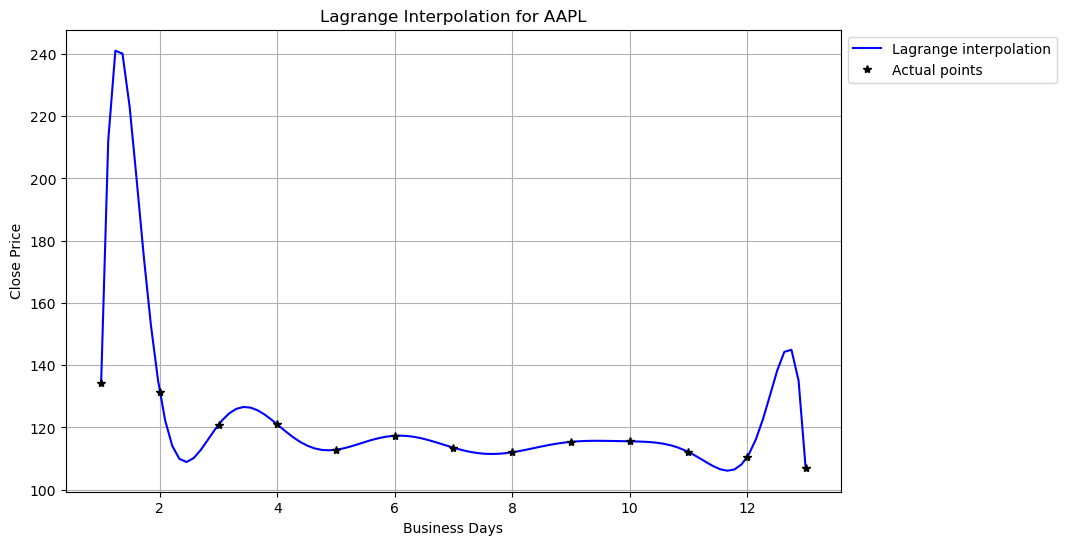

Interpolated price for AAPL for day x = 8.5: 113.87019050535491


In [13]:
# LAGRANGE INTERPOLATION

x_inter = np.linspace(min(x_data), max(x_data), 100)
y_inter = [nu.lagrange_interpolation(xy_points, xi, len(x_data) - 1) for xi in x_inter]

plt.figure(figsize=(10, 6))
plt.plot(x_inter, y_inter, color='blue', label='Lagrange interpolation')
plt.plot(x_data, y_data, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Lagrange Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

interpolated_price = nu.lagrange_interpolation(xy_points, 8.5, len(x_data) - 1)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

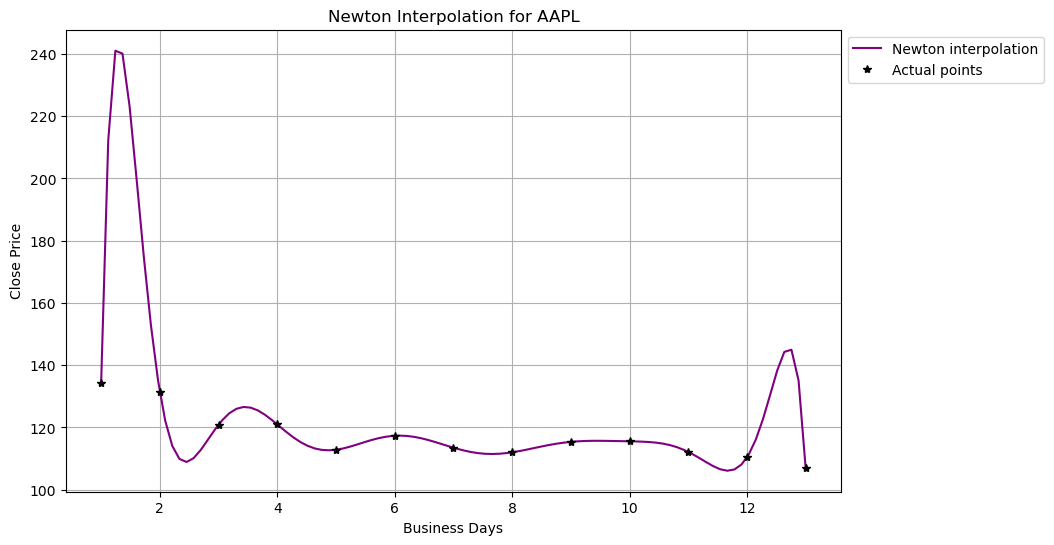

Interpolated price for AAPL for day x = 8.5: 113.8701905053548


In [14]:
# NEWTON INTERPOLATION

x_inter = np.linspace(min(x_data), max(x_data), 100)
y_inter = [nu.newton_interpolation(x_data, y_data, xi) for xi in x_inter]

plt.figure(figsize=(10, 6))
plt.plot(x_inter, y_inter, color='purple', label='Newton interpolation')
plt.plot(x_data, y_data, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Newton Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

interpolated_price = nu.newton_interpolation(x_data, y_data, 8.5)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

# Q9

In [15]:
def f(x):
    return np.exp(x**2 / 10)

def f_prime(x):
    return (x / 5) * np.exp(x**2 / 10)

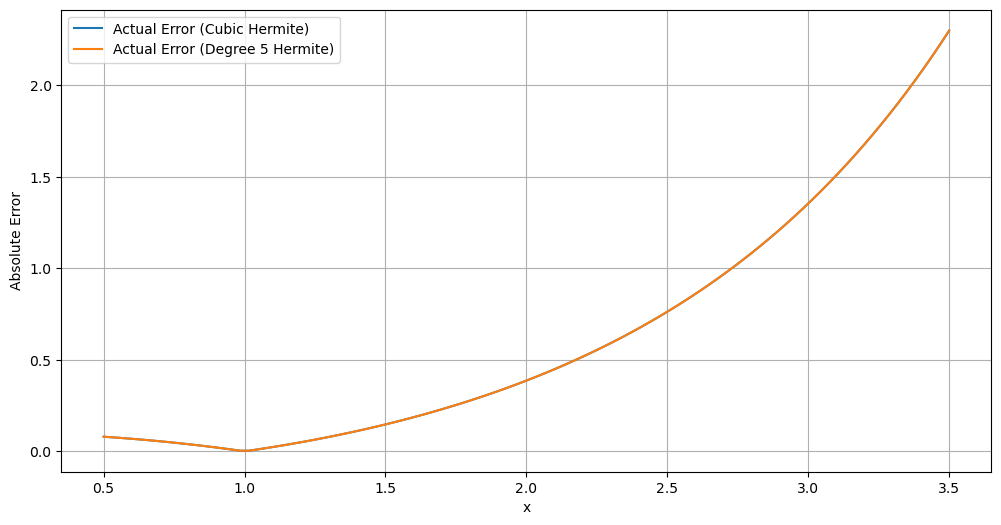

(a) Approximation of f(1.2) with Cubic Hermite: 1.1051709180756477
(a) Actual f(1.2): 1.1548841085249135
(a) Absolute Error: 0.04971319044926581
(b) Approximation of f(1.2) with Degree 5 Hermite: 1.1051709180756477
(b) Actual f(1.2): 1.1548841085249135
(b) Absolute Error: 0.04971319044926581


In [16]:
# Part (a): Cubic Hermite Interpolating Polynomial
x_pts_a = [1, 1.5]
y_values_a = [f(x) for x in x_pts_a]
y_derivatives_a = [f_prime(x) for x in x_pts_a]

z_a, coef_a = nu.hermite_interpolation(x_pts_a, y_values_a, y_derivatives_a)

# Approximate f(1.2) using the polynomial
x_target = 1.2
approx_a = nu.evaluate_hermite(z_a, coef_a, x_target)
actual_a = f(x_target)
error_a = abs(approx_a - actual_a)

# Part (b): Hermite Interpolating Polynomial of Degree 5
x_pts_b = [1, 2, 3]
y_values_b = [f(x) for x in x_pts_b]
y_derivatives_b = [f_prime(x) for x in x_pts_b]

z_b, coef_b = nu.hermite_interpolation(x_pts_b, y_values_b, y_derivatives_b)

# Approximate f(1.2) using the polynomial
approx_b = nu.evaluate_hermite(z_b, coef_b, x_target)
actual_b = f(x_target)
error_b = abs(approx_b - actual_b)

# Calculate error bounds and plot
x_vals = np.linspace(0.5, 3.5, 100)
f_vals = [f(x) for x in x_vals]
approx_vals_a = [nu.evaluate_hermite(z_a, coef_a, x) for x in x_vals]
approx_vals_b = [nu.evaluate_hermite(z_b, coef_b, x) for x in x_vals]

errors_a = np.abs(np.array(f_vals) - np.array(approx_vals_a))
errors_b = np.abs(np.array(f_vals) - np.array(approx_vals_b))

plt.figure(figsize=(12, 6))
plt.plot(x_vals, errors_a, label="Actual Error (Cubic Hermite)")
plt.plot(x_vals, errors_b, label="Actual Error (Degree 5 Hermite)")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()

print(f"(a) Approximation of f(1.2) with Cubic Hermite: {approx_a}")
print(f"(a) Actual f(1.2): {actual_a}")
print(f"(a) Absolute Error: {error_a}")

print(f"(b) Approximation of f(1.2) with Degree 5 Hermite: {approx_b}")
print(f"(b) Actual f(1.2): {actual_b}")
print(f"(b) Absolute Error: {error_b}")

(a) Hermite Polynomial Coefficients: [1.10517092 0.         0.         0.        ]
(a) Approximation of f(1.2): 1.1051709180756477
(a) Maximum error: 0.1471517981162167


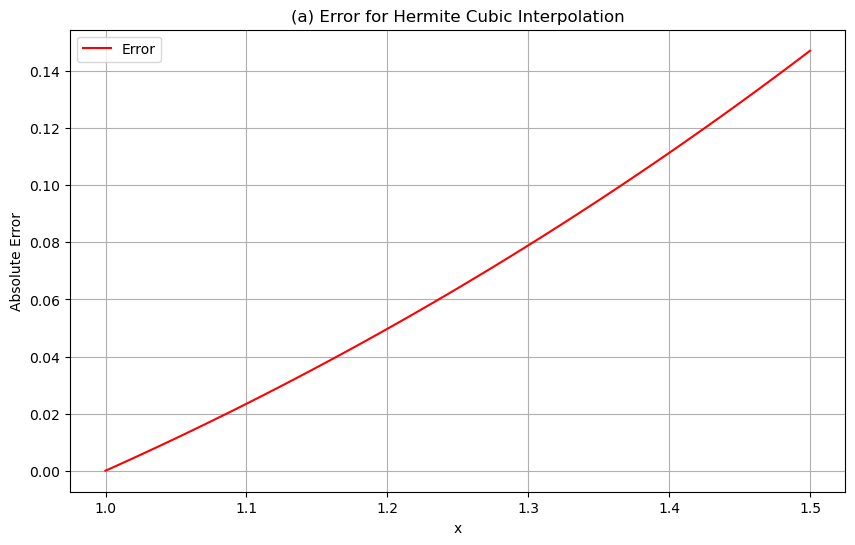

(b) Hermite Polynomial Coefficients: [1.10517092 0.         0.         0.         0.         0.        ]
(b) Approximation of f(1.2): 1.1051709180756477
(b) Maximum error: 1.3544321930813021


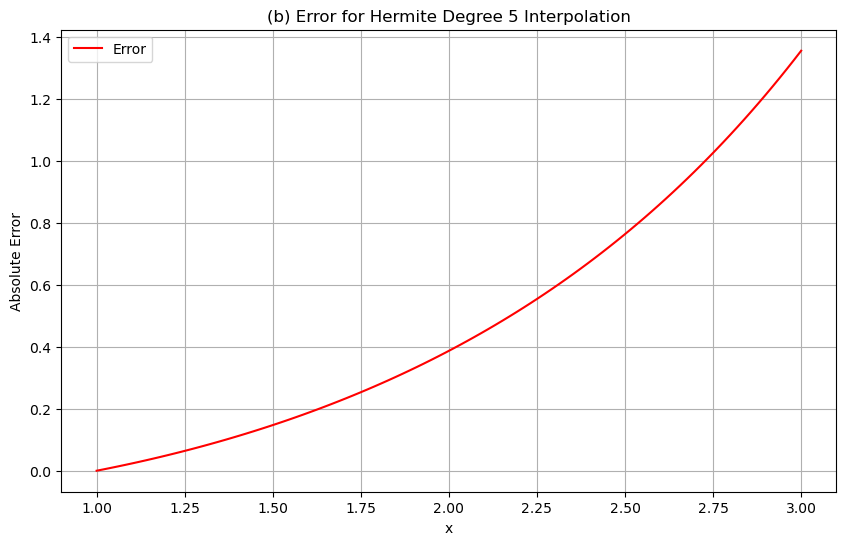

In [17]:
def f(x):
    return np.exp(x**2 / 10)

def f_prime(x):
    return (2 * x / 10) * np.exp(x**2 / 10)

# (a) Hermite Interpolation on [1, 1.5]
x_a = [1, 1.5]
y_a = f(np.array(x_a))
dy_a = f_prime(np.array(x_a))

# Compute Hermite polynomial coefficients
z_a, coef_a = nu.hermite_interpolation(x_a, y_a, dy_a)

# Display coefficients
print(f"(a) Hermite Polynomial Coefficients: {coef_a}")

# Approximate f(1.2)
approx_a = nu.evaluate_hermite(z_a, coef_a, 1.2)
print(f"(a) Approximation of f(1.2): {approx_a}")

# Compute error and plot
x_dense_a = np.linspace(1, 1.5, 100)
f_dense_a = f(x_dense_a)
hermite_dense_a = [nu.evaluate_hermite(z_a, coef_a, xi) for xi in x_dense_a]
error_a = np.abs(f_dense_a - hermite_dense_a)

# Maximum error
max_error_a = np.max(error_a)
print(f"(a) Maximum error: {max_error_a}")

plt.figure(figsize=(10, 6))
plt.plot(x_dense_a, error_a, label="Error", color="red")
plt.title("(a) Error for Hermite Cubic Interpolation")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()

# (b) Hermite Interpolation on [1, 2, 3]
x_b = [1, 2, 3]
y_b = f(np.array(x_b))
dy_b = f_prime(np.array(x_b))

# Compute Hermite polynomial coefficients
z_b, coef_b = nu.hermite_interpolation(x_b, y_b, dy_b)

# Display coefficients
print(f"(b) Hermite Polynomial Coefficients: {coef_b}")

# Approximate f(1.2)
approx_b = nu.evaluate_hermite(z_b, coef_b, 1.2)
print(f"(b) Approximation of f(1.2): {approx_b}")

# Compute error and plot
x_dense_b = np.linspace(1, 3, 100)
f_dense_b = f(x_dense_b)
hermite_dense_b = [nu.evaluate_hermite(z_b, coef_b, xi) for xi in x_dense_b]
error_b = np.abs(f_dense_b - hermite_dense_b)

# Maximum error
max_error_b = np.max(error_b)
print(f"(b) Maximum error: {max_error_b}")

plt.figure(figsize=(10, 6))
plt.plot(x_dense_b, error_b, label="Error", color="red")
plt.title("(b) Error for Hermite Degree 5 Interpolation")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()



Part (a):
(a) Coefficients of the Hermite interpolating polynomial:
Interval 0: a=1.1051709180756477, b=0.22103418361512955, c=0.13029121321896353, d=0.03249522403128813
(a) Approximation of f(1.2): 1.1548493651196825
(a) Maximum Error (upper bound): 3.8053324908027264e-05


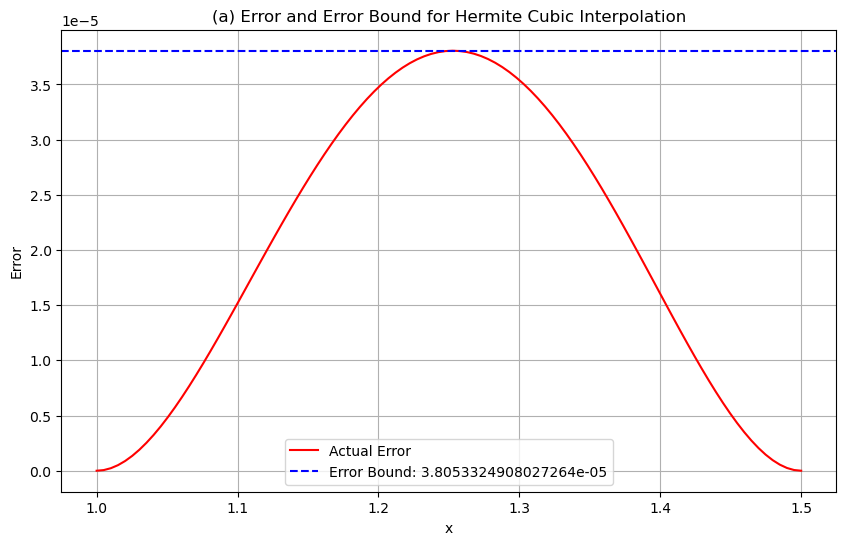


Part (b):
(b) Coefficients of the Hermite interpolating polynomial:
Interval 0: a=1.1051709180756477, b=0.22103418361512955, c=0.12116309241010059, d=0.044456503540392545
Interval 1: a=1.4918246976412703, b=0.5967298790565082, c=0.23411361573985223, d=0.13693491871931895
(b) Approximation of f(1.2): 1.1545799305234008
(b) Maximum Error (upper bound): 0.0024152740087879376


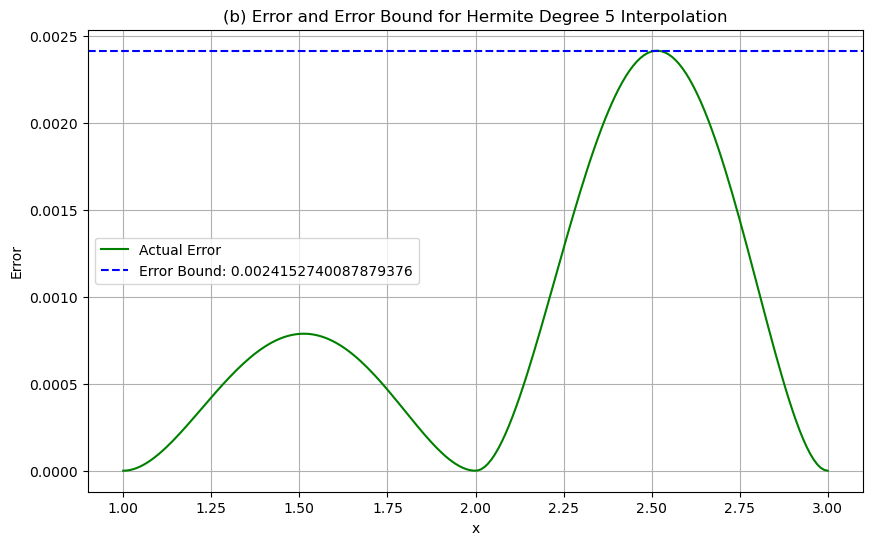

In [2]:
def phi_i(x, x_i, x_next):
    delta_x = x_next - x_i
    if x_i <= x < x_next:
        return (1 - 2 * (x - x_i) / delta_x) * ((x_next - x) / delta_x) ** 2
    else:
        return 0

def psi_i(x, x_i, x_next):
    delta_x = x_next - x_i
    if x_i <= x < x_next:
        return (x - x_i) * ((x_next - x) / delta_x) ** 2
    else:
        return 0

def hermite_interpolation_coefficients(x_nodes, f_values, f_derivatives):
    n = len(x_nodes)
    coefficients = []
    for i in range(n - 1):
        delta_x = x_nodes[i + 1] - x_nodes[i]
        a = f_values[i]
        b = f_derivatives[i]
        c = (3 * (f_values[i + 1] - f_values[i]) / delta_x**2) - \
            ((f_derivatives[i + 1] + 2 * f_derivatives[i]) / delta_x)
        d = (2 * (f_values[i] - f_values[i + 1]) / delta_x**3) + \
            ((f_derivatives[i] + f_derivatives[i + 1]) / delta_x**2)
        coefficients.append((a, b, c, d))
    return coefficients

def f(x):
    return np.exp(x**2 / 10)

def f_prime(x):
    return (2 * x / 10) * np.exp(x**2 / 10)

# Part (a)
print("\nPart (a):")
x_a = [1, 1.5]
y_a = f(np.array(x_a))
dy_a = f_prime(np.array(x_a))

# (i) Compute coefficients of the interpolating polynomial
coefficients_a = hermite_interpolation_coefficients(x_a, y_a, dy_a)
print("(a) Coefficients of the Hermite interpolating polynomial:")
for i, coeffs in enumerate(coefficients_a):
    print(f"Interval {i}: a={coeffs[0]}, b={coeffs[1]}, c={coeffs[2]}, d={coeffs[3]}")

# (ii) Approximate f(1.2)
approx_a = 0
for i, (a, b, c, d) in enumerate(coefficients_a):
    if x_a[i] <= 1.2 <= x_a[i + 1]:  # Find the correct interval for 1.2
        delta_x = 1.2 - x_a[i]
        approx_a = a + b * delta_x + c * delta_x**2 + d * delta_x**3
        break
print(f"(a) Approximation of f(1.2): {approx_a}")


# (iii) Compute the error
x_dense_a = np.linspace(1, 1.5, 100)
y_actual_a = f(x_dense_a)
# Evaluate Hermite polynomial for dense x values
y_hermite_a = []
for x in x_dense_a:
    for i, (a, b, c, d) in enumerate(coefficients_a):
        if x_a[i] <= x <= x_a[i + 1]:  # Check if x is in the current interval
            delta_x = x - x_a[i]
            value = a + b * delta_x + c * delta_x**2 + d * delta_x**3
            y_hermite_a.append(value)
            break

error_a = np.abs(y_actual_a - y_hermite_a)
max_error_a = np.max(error_a)
print(f"(a) Maximum Error (upper bound): {max_error_a}")

# (iv) Plot the error
plt.figure(figsize=(10, 6))
plt.plot(x_dense_a, error_a, label="Actual Error", color="red")
plt.axhline(y=max_error_a, color='blue', linestyle='--', label=f"Error Bound: {max_error_a}")
plt.title("(a) Error and Error Bound for Hermite Cubic Interpolation")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

# Part (b)
print("\nPart (b):")
x_b = [1, 2, 3]
y_b = f(np.array(x_b))
dy_b = f_prime(np.array(x_b))

# (i) Compute coefficients of the interpolating polynomial
coefficients_b = hermite_interpolation_coefficients(x_b, y_b, dy_b)
print("(b) Coefficients of the Hermite interpolating polynomial:")
for i, coeffs in enumerate(coefficients_b):
    print(f"Interval {i}: a={coeffs[0]}, b={coeffs[1]}, c={coeffs[2]}, d={coeffs[3]}")

# (ii) Approximate f(1.2)
approx_b = 0
for i, (a, b, c, d) in enumerate(coefficients_b):
    if x_b[i] <= 1.2 <= x_b[i + 1]:  # Find the correct interval for 1.2
        delta_x = 1.2 - x_b[i]
        approx_b = a + b * delta_x + c * delta_x**2 + d * delta_x**3
        break
print(f"(b) Approximation of f(1.2): {approx_b}")


# (iii) Compute the error
x_dense_b = np.linspace(1, 3, 200)
y_actual_b = f(x_dense_b)
# Evaluate Hermite polynomial for dense x values
y_hermite_b = []
for x in x_dense_b:
    for i, (a, b, c, d) in enumerate(coefficients_b):
        if x_b[i] <= x <= x_b[i + 1]:  # Check if x is in the current interval
            delta_x = x - x_b[i]
            value = a + b * delta_x + c * delta_x**2 + d * delta_x**3
            y_hermite_b.append(value)
            break

error_b = np.abs(y_actual_b - y_hermite_b)
max_error_b = np.max(error_b)
print(f"(b) Maximum Error (upper bound): {max_error_b}")

# (iv) Plot the error
plt.figure(figsize=(10, 6))
plt.plot(x_dense_b, error_b, label="Actual Error", color="green")
plt.axhline(y=max_error_b, color='blue', linestyle='--', label=f"Error Bound: {max_error_b}")
plt.title("(b) Error and Error Bound for Hermite Degree 5 Interpolation")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()
